<a href="https://colab.research.google.com/github/lucianosilva-github/compiladores/blob/main/LINGUAGENS_PARADIGMAS%20-%20AULA%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINGUAGENS E PARADIGMAS - AULA 01**

**Prof. Luciano Silva**

**OBJETIVOS DA AULA:**

*   Conhecer a estrutura do processador Intel 8086
*   Conhecer as principais instruções do Assembly para 8086
*   Implementar geração de código completa para a regra de expressões para o processador Intel 8086


In [ ]:
!pip install rply

**ESTRUTURA DO PROCESSADOR INTEL 8086**

O 8086 (também chamado de iAPX 86) é um microprocessador de 16 bits da Intel criado entre os anos de 1976 e 8 de Junho de 1978, quando ele foi lançado. O Intel 8088, lançado em 1º de Julho de 1979, é um chip suavemente modificado com um barramento externo de 8 bits (permitindo o uso de circuitos integrados mais baratos) e é notável como o processador usado no design original do IBM PC.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/I8086.jpg"></img>

O processador 8086 deu à luz à Arquitetura x86, que eventualmente virou a linha de maior sucesso da Intel. Em 5 de Junho de 2018, a Intel lançou uma edição limitada de CPU celebrando o quadragésimo aniversário do Intel 8086, chamado Intel Core i7-8086K.

O fluxograma mostrado abaixo pode ser subdividido em duas partes, chamadas de Execute unit (EU) e Bus Interface Unit (BIU). A BIU consiste em um segmento de registradores, somados para gerar 20 bits de endereçamento e instrução. Uma vez que o endereço foi enviado à BIU, a instrução e os bytes dos dados são encontrados da memória e eles são empilhados numa pilha de 6 bytes.

<img src="https://4.bp.blogspot.com/-ZhiMK9f90bs/UBetuFldSoI/AAAAAAAAAMg/1N1q9DcAbLw/s1600/arquitetura.png"></img>

**Execution Unit(EU)**


A unidade de execução consiste em... registradores 16-bit AX,BX, CX e DX e ponteiros como SP(Stack Pointer), BP (Base Pointer) e finalmente registros de índice como SI (Source Index) e DI(Destination Index). O registrador de 16-bit pode ser dividido em dois registradores de 8-bits. Por exemplo, AX pode ser dividido em registradores AH (High Byte) e AL (Low Byte), assim como os demais registradores de uso geral. Isso permite operações e compatibilidade do byte com a geração de processadores de 8-bit, o 8080 e 8085. A fonte do 8085 poderia ser "traduzido" no código do 8086 e montado.

**Bus Interface Unit(BIU)**

O interfaceamento da EU com o bus de dados e bus de endereços do sistema é feito pela BUS INTERFACE UNIT (BIU), que gera todo o endereçamento de memória (1 mega) e I/O (64K), assim como interfaceia o bus de dados do sistema (8 bits) com o bus de dados da EU (16 bits). A BIU é composta por 5 registradores de 16 bits, uma estrutura de armazenamento de dados tipo fila, para armazenamento de até 4 bytes de instruções e um sistema para gerar o endereçamento de 20 bits (1 MB de endereçamento), a partir de registradores de 16 bits cada.

**Registradores**

Os oitos registradores de uso geral da EU são descritos a seguir:

* AX: é o chamado ACUMULADOR (o X refere-se a “eXtended”). O AX pode ser dividido em dois registradores de 8 bits: AL e AH, sendo AL formado pelo byte menos significativo (D0 a D7), enquanto AH é constituído pelo byte mais significativo (D8 a D15), podendo cada um deles ser acessado separadamente.

* BX: assim como o AX, o BX também pode ser dividido em BL e BH. É o chamado registrador de BASE, pois pode ser usado como base de endereçamento para manipulação de tabelas.

* CX: também pode ser dividido em CL e CH. É chamado registrador de CONTAGEM, pois além de trabalhar com dados também é usado para contagens em instruções com “LOOPS” na manipulação de strings.

* DX: pode ser dividido em DL e DH. É chamado de registrador de DADOS, pois ele pode ser usado como uma extensão do AX em operações de multiplicação e divisão.

* SP: é o STACK POINTER ou ponteiro de pilhas, que aponta para o topo da memória do tipo pilha usada pelo 8088.

* BP: este registrador, que é chamado de BASE POINTER, é usado para endereçamento de memória (geralmente relacionado a pilha, ou seja, é uma registrador de base para a pilha). Pode conter o endereço inicial (base) de uma tabela que será manipulada pela CPU.

* SI: SOURCE INDEX (registrador de índice que aponta para a origem dos dados que serão movimentados) é usado para indexação de tabelas no endereçamento indireto.

* DI: DESTINATION INDEX (registrador de índice que aponta para o destino dos dados que serão movimentados). Assim como o SI, o registrador DI é utilizado para a indexação no endereçamento indireto.


**Registradores de Flags**

O registrador de flags contém os seguintes principais bits:

* ZF (Zero Flag): indica se o resultado de uma operação aritmética é igual a zero (1) ou diferente de zero (0). Se numa operação os valores são iguais o ZF = 1.

* SF (Sign Flag): indica se o resultado de uma operação com sinal é positivo (0), em caso contrário (1).

* TF (Trap Flag): permite a operação “passo a passo” para debug.

* IF (Interrupt Flag): indica se as interrupções estão habilitadas (1) ou não (0).

* DF (Direction Flag): para operações com strings, se D=0 os registradores de índice serão incrementados, caso contrário (D=1) serão decrementados.

* OF (Overflow Flag): indica um estouro da capacidade de armazenamento de um registrador.


**Registradores de Segmento**

Os endereços dos segmentos são armazenados nos 4 seguintes registradores da BIU:

* CS (CODE SEGMENT): endereça o segmento onde devem estar as instruções a serem executadas pela CPU.

* SS (STACK SEGMENT): endereça o segmento que está reservado ao uso da PILHA ou STACK.

* DS (DATA SEGMENT): como o nome diz, acessa o segmento reservado aos dados manipulados pelo 8088.

* ES (EXTRA SEGMENT): é usado para acessar outro segmento que conterá dados. Normalmente, é usado para manipulação de tabelas e strings.





**ASSEMBLY PARA INTEL 8086**

A seguir, temos um resumo das principais instruções (mnemônicos) do Assembly Intel 8086:

**Operações Aritméticas**

* **ADD:** Realiza a adição de dois dados e armazena o resultado no registrador da esquerda.
Ex.:

  mov al, 1

  mov bl, 2

  add al, bl


* **INC:** Incrementa em 1 o registrador especificado.

* **SUB:** Realiza a subtração de um dado por outro e armazena o resultado no registrador da esquerda.
Ex.:

  mov al, 1

  mov bl, 2

  sub al, bl

* **DEC:** Decrementa em 1 o registrador especificado.

* **CMP:** Faz a comparação entre dois valores.
Ex.:

  cmp al, 1

  cmp ah, [var]

  cmp al, ah

* **MUL/IMUL:** para multiplicações não-sinalizadas utilizamos o comando MUL. Já para multiplicações sinalizadas, o comando usado é o IMUL.
Ex.:

  mov al, 1

  mov bl, 2

  mul al,bl

  mov bl, 3

  imul bl

* **DIV/IDIV:** Realiza a divisão de valores. Para divisões não-sinalizadas, usamos o comando DIV. Já para multiplicações sinalizadas, o comando usado é o IDIV.
Ex.:

  mov al, 1

  mov bl, 2

  div al,bl

OBS.: Nesse caso, AL tem AX/BL e AH tem AX%BL.

**Lógicas**

* **AND:** Executa a função E bit-a-bit.

* **NOT:** É o operando de negação, que executa a operação bit-a-bit.

* **OR:** É o operando lógico OU, que executa a operação bit-a-bit.

* **XOR:** Operando lógico do OU EXCLUSIVO, também bit-a-bit.


**Controle**

* **JMP:** Salto incondicional para outra parte do programa.

* **JE/JZ:** Salta para outra parte do programa no caso do primeiro valor ser igual ao segundo.

* **JL/JNGE:** Salta caso o primeiro operador seja menor que o segundo (números sinalizados).

* **JLE/JNG:** Salta caso o primeiro operador seja menor ou igual ao segundo (números sinalizados).

* **JB/JNAE:** Salta caso o primeiro operador seja menor que o segundo (números nãosinalizados).

* **JBE/JNA:** Salta caso o primeiro operador seja menor ou igual ao segundo (números nãosinalizados).

* **JO:** Salta caso haja estouro de capacidade (overflow).

* **JNE/JNZ:** Salta se o primeiro valor for diferente do segundo.

* **JNL/JGE:** Salta se o primeiro valor for menor do segundo.

* **JNLE/JG:** Salta caso o primeiro seja menor ou igual ao segundo (números nãosinalizados).

* **JNB/JAE:** Salta se o primeiro valor não for menor que o segundo.

* **JNBE/JA:** Salta se o primeiro valor não for menor ou igual ao segundo.

* **JNO:** Salta se não houver estouro de capacidade.


**Transferência de Dados**

* **MOV:** Move dados para registradores, ou dos registradores para a memória. Ex.: mov AL, 30 _ move para AL o valor 30


**Diretivas**

* **DB:** Definição de Byte (1 byte).

* **DW:** Definição de Word (2 bytes).

* **HLT:** usado para acabar com a execução (parar o processador).


**GERAÇÃO DE CÓDIGO PARA PROCESSADOR-ALVO (Intel 8086)**

Uma vez que tenhamos passado pela fase de alocação de registradores, para que o código intermediário em P-code possa ser transformado em código para o processador-alvo (Intel 8086), devemos associar cada posição da pilha utilizada pelo programa a um registrador.

No exemplo do código em P-code abaixo, calculamos (na última aula) que 3 registradores seriam necessários para alocar todas as posições utilizadas na pilha. Assim, poderíamos fazer a seguinte associação: posição 0 --> registrador ax; posição 1 --> registrador bx e posição 2 --> registrador cx.

Com esta alocação, o código final (para o processador Intel 8086) ficaria como:

<table border=1>
<tr> <th> Código Intermediário<th> Conjunto de Longevidade <th> Aresta (arestas) <th> Código Assembly 8086
<tr> <td> lit 0 2 <td> 0 <td> <td> mov ax, 2
<tr> <td> lod 0 x  <td> 0 1 <td> 0-1 <td> mov bx, x
<tr> <td> opr 0 4 <td> 0 <td> <td> mul ax,bx
<tr> <td> lit 0 60 <td> 0 1 <td> 0-1 <td> mov bx,60
<tr> <td> lod 0 y <td> 0 1 2 <td> 0-1 0-2 1-2<td> mov cx, y
<tr> <td> opr 0 5 <td> 0 1 <td>0-1 <td> div bx,cx
<tr> <td> opr 0 3 <td> 0 <td> <td> sub ax,bx
</table>

**EXERCÍCIO**

Dado o código intermediário associado às expressões, faça a sua transformação para código do processador Intel 8086 **\< expression \>** :


\<prog\> ::= \<var-decls\> \<atrib\>

\<var-decls\> ::= \<var-decl\>

       | \<var-decl\> \<var-decls\>

\<var-decl\> ::= \<type\> ID ;

\<type\> ::= int | string

\<atrib\> ::= ID = \<expression\>

\<expression\> ::= ID

      | NUMBER

      | \<expression\> "+" \<expression\>

      | \<expression\> "-" \<expression\>

      | \<expression\> "*" \<expression\>

      | \<expression\> "/" \<expression\>

      | "(" <expression> ")"

* Implementação do analisador léxico:





In [ ]:
from rply import LexerGenerator

lg = LexerGenerator()

lg.add('NUMBER', r'\d+')
lg.add('PLUS', r'\+')
lg.add('MINUS', r'-')
lg.add('MUL', r'\*')
lg.add('DIV', r'/')
lg.add('OPEN_PARENS', r'\(')
lg.add('CLOSE_PARENS', r'\)')

lg.add('INT', r'int')
lg.add('STRING', r'string')
lg.add('ID', r'[a-zA-z][a-zA-z0-9]*')
lg.add('EQUALS', r'=')
lg.add('SEMICOL', r';')

lg.ignore('\s+')

lexer = lg.build()

* Classes dos nós da árvore sintática, já com o método accept para receber os visitors:

In [ ]:
from rply.token import BaseBox

class Prog(BaseBox):
    def __init__(self, decls,atrib):
        self.decls = decls
        self.atrib = atrib

    def accept(self, visitor):
        visitor.visit_prog(self)

class VarDecls(BaseBox):
    def __init__(self, decl,decls):
        self.decl = decl
        self.decls = decls

    def accept(self, visitor):
        visitor.visit_vardecls(self)

class VarDecl(BaseBox):
    def __init__(self, id,tp):
        self.id = id
        self.tp = tp


    def accept(self, visitor):
        visitor.visit_vardecl(self)

class Atrib(BaseBox):
    def __init__(self, id,expr):
        self.id = id
        self.expr = expr

    def accept(self, visitor):
        visitor.visit_atrib(self)

class Expr(BaseBox):
    def accept(self, visitor):
        method_name = 'visit_{}'.format(self.__class__.__name__.lower())
        visit = getattr(visitor, method_name)
        visit(self)

class Id(Expr):
    def __init__(self, value):
        self.value = value

class Number(Expr):
    def __init__(self, value):
        self.value = value


class BinaryOp(Expr):
    def __init__(self, left, right):
        self.left = left
        self.right = right

class Add(BinaryOp):
  pass


class Sub(BinaryOp):
  pass


class Mul(BinaryOp):
  pass


class Div(BinaryOp):
  pass


* Implementação do analisador sintático:

In [ ]:
from rply import ParserGenerator

pg = ParserGenerator(
    # A list of all token names, accepted by the lexer.
    ['NUMBER', 'OPEN_PARENS', 'CLOSE_PARENS',
     'PLUS', 'MINUS', 'MUL', 'DIV', 'INT', 'STRING', 'ID','SEMICOL',
     'EQUALS'
    ],
    # A list of precedence rules with ascending precedence, to
    # disambiguate ambiguous production rules.
    precedence=[
        ('left', ['PLUS', 'MINUS']),
        ('left', ['MUL', 'DIV'])
    ]
)

@pg.production('prog : vardecls atrib')
def prog(p):
    return Prog(p[0],p[1])

@pg.production('vardecls : vardecl')
def expression_vardeclsOne(p):
    return VarDecls(p[0],None)

@pg.production('vardecls : vardecl vardecls')
def vardecls(p):
    return VarDecls(p[0],p[1])

@pg.production('vardecl : STRING ID SEMICOL')
def expression_vardeclstring(p):
    return VarDecl(p[1].getstr(), p[0].getstr())

@pg.production('vardecl : INT ID SEMICOL')
def expression_vardeclint(p):
    return VarDecl(p[1].getstr(), p[0].getstr())

@pg.production('atrib : ID EQUALS expression')
def atrib(p):
    return Atrib(p[0].getstr(),p[2])


@pg.production('expression : ID')
def expression_id(p):
    return Id(p[0].getstr())

@pg.production('expression : NUMBER')
def expression_number(p):
    return Number(int(p[0].getstr()))

@pg.production('expression : OPEN_PARENS expression CLOSE_PARENS')
def expression_parens(p):
    return p[1]

@pg.production('expression : expression PLUS expression')
@pg.production('expression : expression MINUS expression')
@pg.production('expression : expression MUL expression')
@pg.production('expression : expression DIV expression')
def expression_binop(p):
    left = p[0]
    right = p[2]
    if p[1].gettokentype() == 'PLUS':
        return Add(left, right)
    elif p[1].gettokentype() == 'MINUS':
        return Sub(left, right)
    elif p[1].gettokentype() == 'MUL':
        return Mul(left, right)
    elif p[1].gettokentype() == 'DIV':
        return Div(left, right)
    else:
        raise AssertionError('Oops, this should not be possible!')

parser = pg.build()

* Visitor para montar a tabela de símbolos:

In [ ]:
ST={}

class Visitor(object):
  pass

class SymbolTable(Visitor):
    def visit_prog(self, prog):
        prog.decls.accept(self)

    def visit_vardecls(self, d):
        d.decl.accept(self)
        if d.decls!=None:
          d.decls.accept(self)

    def visit_vardecl(self, d):
        ST[d.id]=d.tp


* Visitor para decoração da árvore:

In [ ]:
class Decorator(Visitor):

    def visit_prog(self, i):
        i.atrib.accept(self)

    def visit_atrib(self, i):
        if i.id in ST:
          i.id_decor_type=ST[i.id]
        else:
          raise AssertionError('id not declared')
        i.expr.accept(self)
        i.expr_decor_type=i.expr.decor_type

    def visit_id(self, i):
        if i.value in ST:
          i.decor_type=ST[i.value]
        else:
          raise AssertionError('id not declared')


    def visit_number(self, i):
        i.decor_type="int"


    def visit_add(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="int" and a.right.decor_type=="int":
          a.decor_type="int"


    def visit_sub(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="int" and a.right.decor_type=="int":
          a.decor_type="int"

    def visit_mul(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="int" and a.right.decor_type=="int":
          a.decor_type="int"

    def visit_div(self, a):
        a.left.accept(self)
        a.right.accept(self)
        if a.left.decor_type=="int" and a.right.decor_type=="int":
          a.decor_type="int"

* Visitor para verificação de tipos:

In [ ]:
class TypeVerifier(Visitor):

    def visit_prog(self, i):
        i.atrib.accept(self)

    def visit_atrib(self, i):
        if i.id_decor_type!=i.expr_decor_type:
          raise AssertionError('type error')

    def visit_add(self, a):
        if a.left.decor_type != a.right.decor_type:
          raise AssertionError('type error')


    def visit_sub(self, a):
        if a.left.decor_type != a.right.decor_type:
          raise AssertionError('type error')

    def visit_mul(self, a):
        if a.left.decor_type != a.right.decor_type:
          raise AssertionError('type error')

    def visit_div(self, a):
        if a.left.decor_type != a.right.decor_type:
          raise AssertionError('type error')

* Geração de código intermediário em P-code:

In [ ]:
class IntermediateCode(Visitor):


  def __init__(self):
    self.ic=[]

  def visit_prog(self, i):
    i.atrib.accept(self)

  def visit_atrib(self, i):
    i.expr.accept(self)


  def visit_id(self, i):
    self.ic.append("lod 0 "+i.value)


  def visit_number(self, i):
    self.ic.append("lit 0 "+str(i.value))


  def visit_add(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 2")


  def visit_sub(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 3")

  def visit_mul(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 4")

  def visit_div(self, a):
    a.left.accept(self)
    a.right.accept(self)
    self.ic.append("opr 0 5")

* Análise de longevidade

In [ ]:
def liveness_analysis(ic):
  ic_la=[]
  la=set({})
  t=0
  for i in ic:
    if i.startswith("lit") or i.startswith("lod"):
      la=la.union(set({t}))
      t=t+1
    elif i.startswith("opr"):
          la.remove(t-1)
          t=t-1
    ic_la.append((i,la.copy()))
  return ic_la


In [ ]:
arvore=parser.parse(lexer.lex('int x;int y;int z;z=2*x-60/y'))
arvore.accept(SymbolTable())
arvore.accept(Decorator())
arvore.accept(TypeVerifier())
icvisitor=IntermediateCode()
arvore.accept(icvisitor)
ic=icvisitor.ic
ic_la=liveness_analysis(ic)
for p in ic_la:
  print(p,"\n")


('lit 0 2', {0}) 

('lod 0 x', {0, 1}) 

('opr 0 4', {0}) 

('lit 0 60', {0, 1}) 

('lod 0 y', {0, 1, 2}) 

('opr 0 5', {0, 1}) 

('opr 0 3', {0}) 



* Alocação de registradores

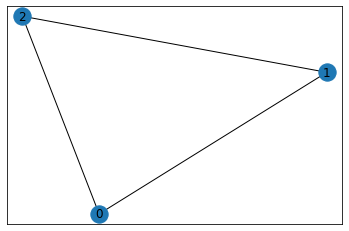

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools


class GraphVisualization:

    def __init__(self):
        self.visual = []


    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    def visualize(self):
        self.graph = nx.Graph()
        self.graph.add_edges_from(self.visual)
        nx.draw_networkx(self.graph)
        plt.show()

G = GraphVisualization()

for (instr,live) in ic_la:
  edges = itertools.combinations(live, 2)
  for (a,b) in edges:
    G.addEdge(a,b)
G.visualize()

In [ ]:
colors = nx.coloring.greedy_color(G.graph, strategy="largest_first")
if colors=={}:
  colors={0:0}
print("posição:registrador\n",colors)
r_8086=["ax","bx","cx","dx"]

posição:registrador
 {0: 0, 1: 1, 2: 2}


Seu desafio, a partir dos registradores estarem alocados será gerar o código em Assembly 8086 conforme modelo visto em aula:

<table border=1>
<tr> <th> Código Intermediário<th> Conjunto de Longevidade <th> Aresta (arestas) <th> Código Assembly 8086
<tr> <td> lit 0 2 <td> 0 <td> <td> mov ax, 2
<tr> <td> lod 0 x  <td> 0 1 <td> 0-1 <td> mov bx, x
<tr> <td> opr 0 4 <td> 0 <td> <td> mul ax,bx
<tr> <td> lit 0 60 <td> 0 1 <td> 0-1 <td> mov bx,60
<tr> <td> lod 0 y <td> 0 1 2 <td> 0-1 0-2 1-2<td> mov cx, y
<tr> <td> opr 0 5 <td> 0 1 <td>0-1 <td> div bx,cx
<tr> <td> opr 0 3 <td> 0 <td> <td> sub ax,bx
</table>

In [ ]:
def Intel8086Code(ic_la):
  "Para cada instrução, seu código deve imprimir o código em Assembly 8086 correspondente, usando os registradores encontrados em colors"
  t=0
  oprs=["add","sub","mul","div"]
  for i,_ in ic_la:
    instruction, op1,op2 = i.split()
    if instruction=="lit" or instruction=="lod":
      print("mov",r_8086[colors[t]],",",op2)
      t=t+1
    elif instruction=="opr":
          t=t-1
          print(oprs[int(op2)-2],r_8086[colors[t-1]],",",r_8086[colors[t]])

Intel8086Code(ic_la)

mov ax , 2
mov bx , x
mul ax , bx
mov bx , 60
mov cx , y
div bx , cx
sub ax , bx


**GERAÇÃO DE CÓDIGO PARA OUTROS COMANDOS (IF, WHILE)**

Códigos para comandos como IF e WHILE podem ser gerados com as **instruções de desvios** (JMP, JL, JE, JNE, JZ,...). Por exemplo, vamos considerar o comando IF mostrado abaixo:

    if (x==3)
      y=4;
    else y=5;

O código em Assembly faria uso de rótulos com instruções de desvio:

            mov ax,x

            mov bx,3

            cmp ax,bx     # compara valor dos registradores

            jne FALSE     # se x não for igual a 3, pula para ELSE

            mov y,4

            jmp CONT      # pula o código de ELSE

    FALSE:  mov y,5

    CONT:   ...


O comando WHILE pode ser reduzido para um comando IF:

    while (x >= 0)
      y++;
    y+=2;


    LOOP: mov ax,x
          mov bx,0
          cmp ax,bx
          jl CONT     # se ax < bx (x<0) sai do LOOP
          mov cx,y
          inc cx
          mov y,cx
          jmp LOOP    # volta a executar o LOOP
    CONT: mov cx,y
          add cx,2
          mov y,cx